In [1]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model
import tensorflow as tf 
import cv2
import imghdr
from matplotlib import pyplot as plt 
from skimage.io import imread
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tensorflow as tf 
import os
import numpy as np
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from os import listdir,makedirs
from os.path import isfile,join


C:\Users\FHILMANBINHA\AppData\Local\Temp\ipykernel_10420\3598306761.py:10: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Constants


img_height, img_width = 256, 256

num_classes = 6  

batch_size = 32

epochs = 10

In [10]:
#Load Pre-trained Model


model = tf.keras.models.load_model('my_modelV6.keras')

In [4]:
data = tf.keras.utils.image_dataset_from_directory('augmented_data_3')
data = data.map(lambda x,y:(x/255, y ))

Found 9919 files belonging to 6 classes.


In [5]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
size = train_size+val_size

In [6]:
size

310

In [7]:
train_datagen= data.take(train_size)
val_datagen = data.skip(train_size).take(val_size)

In [8]:
# Plot Training History

def plot_history(history):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)

    plt.plot(history.history['accuracy'], label='Training Accuracy')

    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

    plt.title('Training and Validation Accuracy')

    plt.xlabel('Epoch')

    plt.ylabel('Accuracy')

    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(history.history['loss'], label='Training Loss')

    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.title('Training and Validation Loss')

    plt.xlabel('Epoch')

    plt.ylabel('Loss')

    plt.legend()

    plt.tight_layout()

    plt.show()

In [9]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [12]:
history = model.fit(train_datagen, epochs = 3,validation_data= val_datagen, callbacks = [tensorboard_callback])


Epoch 1/3
248/248 ━━━━━━━━━━━━━━━━━━━━ 9754s 39s/step - accuracy: 0.6210 - loss: 1.1969 - val_accuracy: 0.8941 - val_loss: 0.3828
Epoch 2/3
248/248 ━━━━━━━━━━━━━━━━━━━━ 9486s 38s/step - accuracy: 0.8292 - loss: 0.5920 - val_accuracy: 0.9057 - val_loss: 0.3324
Epoch 3/3
248/248 ━━━━━━━━━━━━━━━━━━━━ 8277s 33s/step - accuracy: 0.9343 - loss: 0.2132 - val_accuracy: 0.9112 - val_loss: 0.3424


In [13]:
model.save('my_modelV6_2.keras')

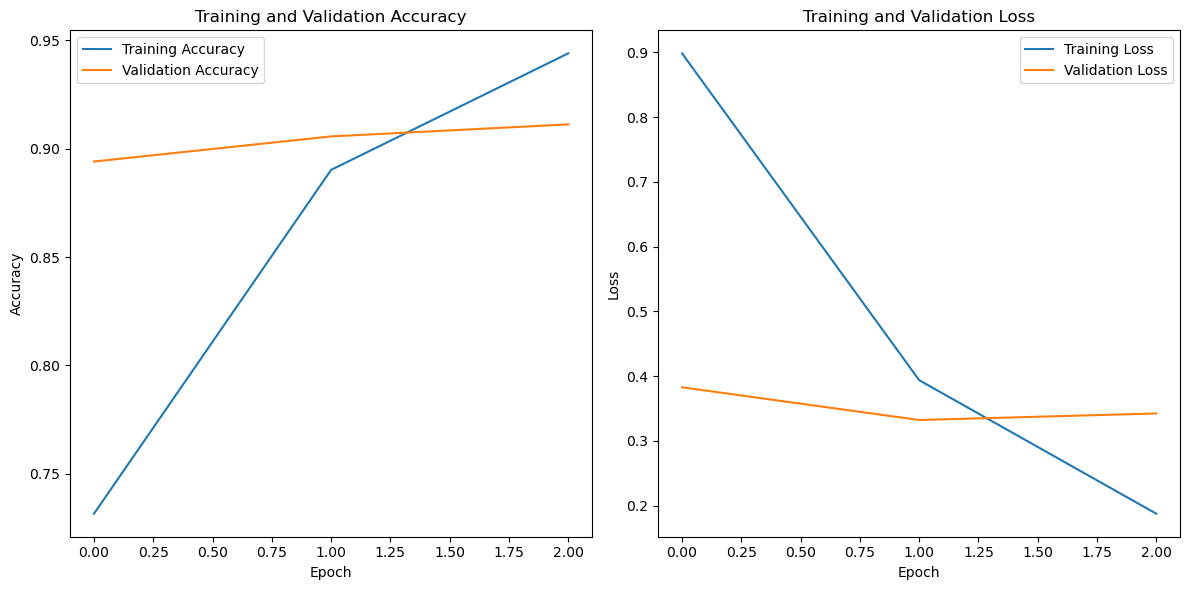

In [14]:
# Plot training history

plot_history(history)


In [15]:
test_data = tf.keras.utils.image_dataset_from_directory('data')
test_data = test_data.map(lambda x,y:(x/255, y ))

Found 1969 files belonging to 6 classes.


In [16]:
model = tf.keras.models.load_model('my_modelV6_2.keras')

In [17]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy


In [18]:
pre = Precision()
re = Recall()

accuracy = SparseCategoricalAccuracy()

In [19]:
# Define the names of your classes
classes = ['NoDie','UBFL','UBLD','UBNF', 'UCON','good']

# Iterate over your test data
for batch in test_data:
    X, y = batch  # Unpack the batch into inputs and true labels
    yhat = model.predict(X)  # Make predictions on the inputs
    predicted_classes = np.argmax(yhat, axis=1)  # Find the classes with the highest predicted probabilities

    # Flatten y and predicted_classes
    y_flat = tf.reshape(y, [-1])
    predicted_classes_flat = tf.reshape(predicted_classes, [-1])

    # Update the state of the metrics
    pre.update_state(y_flat, predicted_classes_flat)
    re.update_state(y_flat, predicted_classes_flat)

    accuracy.update_state(y_flat, predicted_classes_flat)

# Get the current result of the metrics
precision_result = pre.result().numpy()
recall_result = re.result().numpy()

accuracy_result = accuracy.result().numpy()

print(f'Precision: {precision_result}, Recall: {recall_result}')

print(f'Accuracy: {accuracy_result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [9]:
model.save('my_modelV4_4.keras')